# 1.Introduction

In [58]:
using PyPlot
using Formatting
using Random

include("../prml/linear/linear_regression.jl")
include("../prml/linear/ridge_regression.jl")
include("../prml/linear/bayesian_regression.jl")
include("../prml/preprocess/polynomial.jl")

Random.seed!(1234);

## 1.1 Example: Polynomial Curve Fitting

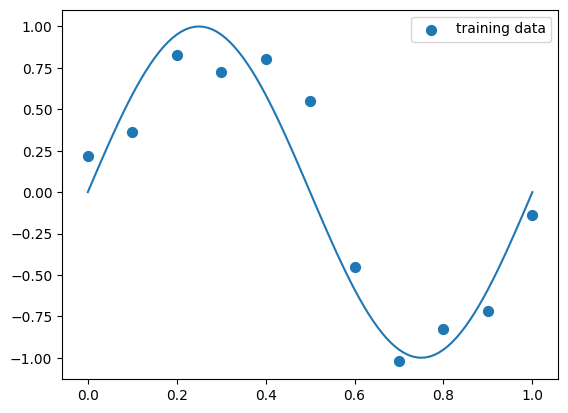

In [8]:
function create_toy_data(func, sample_size, std)

    x = collect(0.0:1/sample_size:1.0)    
    rng = MersenneTwister(1234)
    
    t = func(x) + randn(rng, Float64, size(x)) * std
    return x, t
    
end

function func(x)
    return sin.(2 * pi * x)
end

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = collect(0.0:1/100:1.0)    
y_test = func(x_test)

PyPlot.scatter(x_train, y_train, s=50, label="training data")
PyPlot.plot(x_test, y_test)
PyPlot.legend()
PyPlot.show()

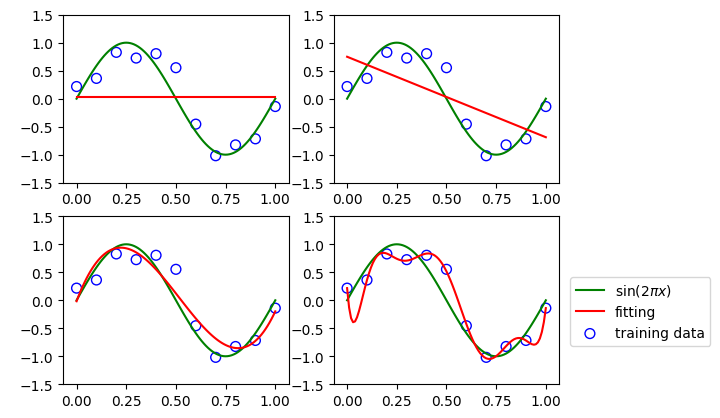

In [9]:
fig = figure()
for (i, degree) in enumerate([0, 1, 3, 9])
    fignum = 220+i
    subplot(fignum)
    feature = PolynomialFeature(degree)
    X_train = transform(feature, x_train) 
    X_test = transform(feature, x_test)
    model = LinearRegression(zeros(Float64, size(X_train)[2]), 0.0)    
    fit(model, X_train, y_train)
    y = predict(model, X_test)
    PyPlot.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    PyPlot.plot(x_test, y_test, c="g", label=L"$\sin(2\pi x)$")
    PyPlot.plot(x_test, y, c="r", label="fitting")
    PyPlot.ylim(-1.5, 1.5)
    PyPlot.annotate(format("M={:2d}", degree), xy=[-0.15, 1], ha="right", va="top")
end
PyPlot.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
PyPlot.show()

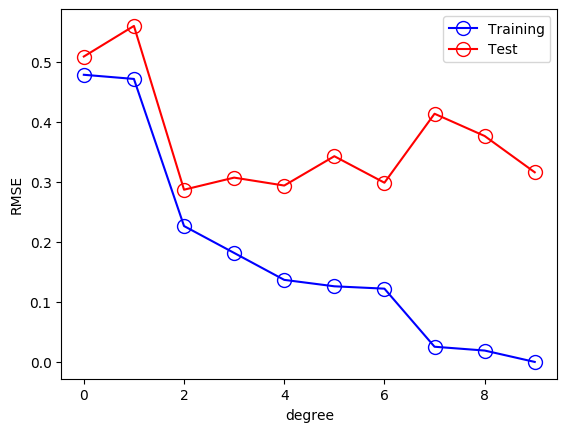

In [10]:
function rmse(a, b)
    return sqrt(mean((a - b).^2))
end

training_errors = []
test_errors = []
rng = MersenneTwister(1234)

for i in 1:10
    feature = PolynomialFeature(i)
    X_train = transform(feature, x_train)
    X_test = transform(feature, x_test)

    model = LinearRegression(zeros(Float64, size(X_train)[2]), 0.0)
    fit(model, X_train, y_train)
    y = predict(model, X_test)
    append!(training_errors, rmse(predict(model, X_train), y_train))
    append!(test_errors, rmse(predict(model, X_test), y_test + randn(rng, Float64, size(y_test))*0.25))
end    

PyPlot.plot(training_errors, linestyle="-",marker="o", mfc="none", mec="b", ms=10, c="b", label="Training")
PyPlot.plot(test_errors, linestyle="-",marker="o", mfc="none", mec="r", ms=10, c="r", label="Test")
PyPlot.legend()
PyPlot.xlabel("degree")
PyPlot.ylabel("RMSE")
PyPlot.show()

### Regularization

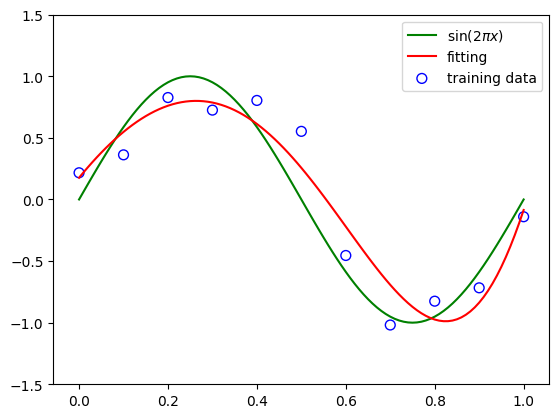

In [11]:
feature = PolynomialFeature(9)
X_train = transform(feature, x_train)
X_test = transform(feature, x_test)

model = RidgeRegression(zeros(Float64, size(X_train)[2]), 1e-3)
fit(model, X_train, y_train)
y = predict(model, X_test)

PyPlot.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
PyPlot.plot(x_test, y_test, c="g", label=L"$\sin(2\pi x)$")
PyPlot.plot(x_test, y, c="r", label="fitting")
PyPlot.ylim(-1.5, 1.5)
PyPlot.legend()
PyPlot.annotate("M=9", xy=[-0.15, 1])
PyPlot.show()

## 1.2.6 Bayesian Curve Fitting

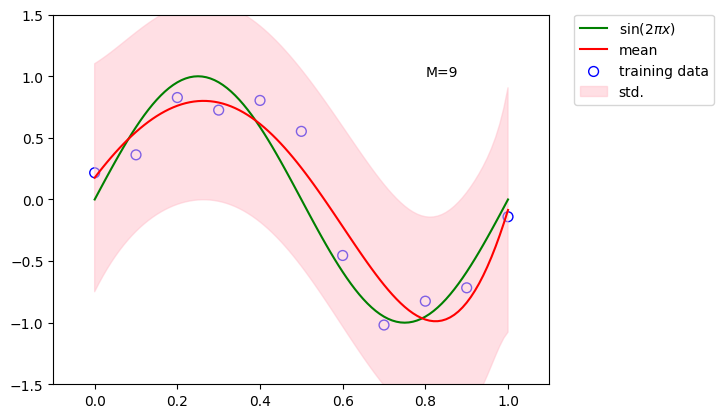

In [66]:
model = BayesianRegression(2e-3, 2)
fit(model, X_train, y_train)
y, y_err = predict(model, X_test, true)

PyPlot.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
PyPlot.plot(x_test, y_test, c="g", label=L"$\sin(2\pi x)$")
PyPlot.plot(x_test, y, c="r", label="mean")
PyPlot.fill_between(x_test, y - y_err[:, 1], y + y_err[:, 1], color="pink", label="std.", alpha=0.5)
PyPlot.xlim(-0.1, 1.1)
PyPlot.ylim(-1.5, 1.5)
PyPlot.annotate("M=9", xy=[0.8, 1])
PyPlot.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
PyPlot.show()